# Table of contents

- [Introduction](#introduction)
- [Data Assessing](#data-assessing)
- [Data Cleaning](#data-cleaning)
- [Exploratory Analysis](#exploratory-analysis)

<a id='introduction'></a>
# INTRODUCTION

Lights, camera, data! Welcome to the backstage of the movie industry, where every number has a story to tell, and every chart unveils a reel of insights as I analyse this movie industry dataset. Get ready for a cinematic journey!

## Dataset Description 

This dataset collects information of over 7000 movies on IMDB between the year 1980-2020 gotten from [kaggle](https://www.kaggle.com/datasets/danielgrijalvas/movies). 
In this analysis I would be answering some questions which are: 
1. Top director based on movie ratings
2. Top genre based on revenue generated 
3. Most produced movies genre
3. Country that produced the most movies
4. Trends in movie production 
5. Budget distribution of movies 
5. Budget and gross relationship 
5. Correlation analysis 
6. Company performance 

Get your popcorn ready, the real show is about to start!

In [3]:
# import necessary libraries needed in this analysis
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(16,6)})

In [4]:
# load the dataset 
df=pd.read_csv('movies.csv')

<a id='data-assessing'></a>
# DATA ASSESSING

In this episode, I will assess the data for data quality issues such as missing data, incorrect datatypes, duplicates and data tidiness issues.

In [5]:
# take a look at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
# take a look at random 10 rows of the data
df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2698,The Bridges of Madison County,PG-13,Drama,1995,"June 2, 1995 (United States)",7.6,76000.0,Clint Eastwood,Richard LaGravenese,Clint Eastwood,United States,24000000.0,182016617.0,Warner Bros.,135.0
1472,License to Kill,PG-13,Action,1989,"July 14, 1989 (United States)",6.6,97000.0,John Glen,Michael G. Wilson,Timothy Dalton,United Kingdom,32000000.0,156167015.0,Danjaq,133.0
6389,All Is Lost,PG-13,Action,2013,"October 25, 2013 (Canada)",6.9,78000.0,J.C. Chandor,J.C. Chandor,Robert Redford,United States,9000000.0,13627519.0,Roadside Attractions,106.0
1629,River of Death,R,Action,1989,"September 29, 1989 (United States)",4.3,1100.0,Steve Carver,Alistair MacLean,Michael Dudikoff,United States,NaN,NaN,Breton Film Productions,107.0
3830,The Specials,R,Action,2000,"September 18, 2000 (United States)",5.8,2200.0,Craig Mazin,James Gunn,Rob Lowe,United States,1000000.0,13276.0,Brillstein-Grey Entertainment,82.0
5939,Ghost Rider: Spirit of Vengeance,PG-13,Action,2011,"February 17, 2012 (United States)",4.3,113000.0,Mark Neveldine,Scott M. Gimple,Nicolas Cage,United States,57000000.0,132563930.0,Columbia Pictures,96.0
6229,Like Someone in Love,Not Rated,Drama,2012,"September 15, 2012 (Japan)",7.0,11000.0,Abbas Kiarostami,Abbas Kiarostami,Rin Takanashi,Japan,NaN,562878.0,Centre national du cinéma et de l'image animée...,109.0
5062,Sunshine,R,Sci-Fi,2007,"July 27, 2007 (United States)",7.2,238000.0,Danny Boyle,Alex Garland,Cillian Murphy,United Kingdom,NaN,34806812.0,DNA Films,107.0
6132,Compliance,R,Crime,2012,"September 26, 2012 (France)",6.4,33000.0,Craig Zobel,Craig Zobel,Ann Dowd,United States,270000.0,592116.0,Bad Cop Bad Cop Film Productions,90.0
2949,Everyone Says I Love You,R,Comedy,1996,"January 17, 1997 (United States)",6.7,36000.0,Woody Allen,Woody Allen,Woody Allen,United States,20000000.0,9759200.0,Miramax,101.0


In [7]:
# check the column headings 
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [8]:
# get the statistical summary of the data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [9]:
# check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# to check for missing values in the data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

There are missing values in some of the columns like rating, budget ,gross, company and runtime which I will be deleting.

In [11]:
# to check for duplicates in the data
df.duplicated().sum()

0

no duplicate values found

## Assesing Text Columns

In [12]:
# to check the name column 
df.name

0                                          The Shining
1                                      The Blue Lagoon
2       Star Wars: Episode V - The Empire Strikes Back
3                                            Airplane!
4                                           Caddyshack
                             ...                      
7663                                      More to Life
7664                                       Dream Round
7665                                     Saving Mbango
7666                                      It's Just Us
7667                                         Tee em el
Name: name, Length: 7668, dtype: object

There is no issue in this column, the words are properly formatted 

In [13]:
# to check the movies Tv ratings
df.rating.unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [14]:
# to check the genres
df.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [15]:
df.year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [16]:
df.released

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

The script shows that the released column contains the release date and the country of release. This column will be splitted to have the release date column and country column 

In [17]:
df.director

0       Stanley Kubrick
1        Randal Kleiser
2        Irvin Kershner
3          Jim Abrahams
4          Harold Ramis
             ...       
7663      Joseph Ebanks
7664       Dusty Dukatz
7665       Nkanya Nkwai
7666      James Randall
7667       Pereko Mosia
Name: director, Length: 7668, dtype: object

In [18]:
df.writer

0                  Stephen King
1       Henry De Vere Stacpoole
2                Leigh Brackett
3                  Jim Abrahams
4            Brian Doyle-Murray
                 ...           
7663              Joseph Ebanks
7664                Lisa Huston
7665               Lynno Lovert
7666              James Randall
7667               Pereko Mosia
Name: writer, Length: 7668, dtype: object

In [19]:
df.star

0         Jack Nicholson
1         Brooke Shields
2            Mark Hamill
3            Robert Hays
4            Chevy Chase
              ...       
7663        Shannon Bond
7664    Michael Saquella
7665        Onyama Laura
7666       Christina Roz
7667    Siyabonga Mabaso
Name: star, Length: 7668, dtype: object

In [20]:
df.country.unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', nan, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

In [21]:
df.company.unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Dow Jazz Films', 'Embi Productions', 'PK 65 Films'], dtype=object)

After assessing the data some discrepancies were noticed, they include 
1. The column headings beiing in lowercase isn't a discrepancy but personally I prefer to work with titlecase so I will be changing  it
2. presence of missing values which will be deleted 
3. wrong  datatypes in Budget, gross, votes and runtime columns which will be changed to their correct datatypes
4. Released column which contains two variables data will be splitted to get the released date

<a id='data-cleaning'></a>
# DATA CLEANING 

Time to get rid of the data issues!

In [22]:
# to change the columns lettercase
df.columns=df.columns.str.title()

In [23]:
# to confirm change in columns lettercase
df.columns

Index(['Name', 'Rating', 'Genre', 'Year', 'Released', 'Score', 'Votes',
       'Director', 'Writer', 'Star', 'Country', 'Budget', 'Gross', 'Company',
       'Runtime'],
      dtype='object')

In [24]:
# drop missing values 
df.dropna(inplace=True)

In [25]:
# to confirm all missing values have been dropped 
df.isnull().sum()

Name        0
Rating      0
Genre       0
Year        0
Released    0
Score       0
Votes       0
Director    0
Writer      0
Star        0
Country     0
Budget      0
Gross       0
Company     0
Runtime     0
dtype: int64

In [26]:
# change datatype 
df['Budget'] = df['Budget'].astype('int64')
df['Gross'] = df['Gross'].astype('int64')
df['Votes'] = df['Votes'].astype('int64')
df['Runtime'] = df['Runtime'].astype('int64')

In [27]:
# to confirm if data types have changed
df.dtypes

Name         object
Rating       object
Genre        object
Year          int64
Released     object
Score       float64
Votes         int64
Director     object
Writer       object
Star         object
Country      object
Budget        int64
Gross         int64
Company      object
Runtime       int64
dtype: object

In [28]:
# to extract date column  from released column 
df['Released_Date'] = df['Released'].str.extract(r'(\w+ \d+, \d{4})')

# to change extracted column to datetime type 
df['Released_Date']=pd.to_datetime(df['Released_Date'])
df['Released_Date']

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7648   2020-01-17
7649   2020-02-14
7650   2020-01-17
7651   2020-02-21
7652   2020-08-28
Name: Released_Date, Length: 5421, dtype: datetime64[ns]

<a id='exploratory-analysis'></a>
# EXPLORATORY ANALYSIS 

Now that I have cleaned the data, Let's open the scene to exploration which involves Computing statistics and creating visualizations with the goal of addressing thequestions that I posed in the Introduction section. I would compute the relevant statistics throughout the analysis when an inference is made about the data

### 1. TOP DIRECTOR BASED ON MOVIE RATINGS

In [29]:
# to get the directors with highest ratings 
average_ratings = df[['Director', 'Score']].groupby('Director').mean()
sorted_average_ratings =average_ratings.sort_values(by='Score', ascending=False)
top_director_average_ratings= sorted_average_ratings.head()
top_director_average_ratings

,Score
Director,
Roberto Benigni,8.6
Tony Kaye,8.5
Nadine Labaki,8.4
Bob Persichetti,8.4
Sergio Leone,8.4


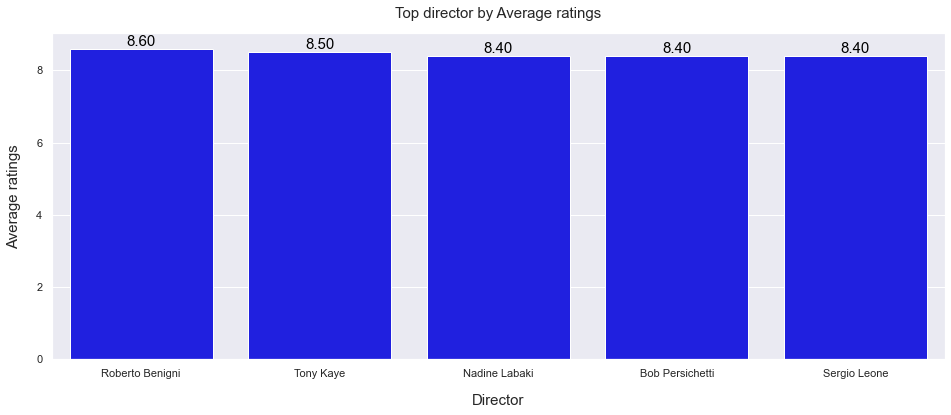

In [30]:
# plot the barchart 
barplot=sns.barplot(x=top_director_average_ratings.index, y=top_director_average_ratings['Score'], color='blue')

# Adding annotations
for index, value in enumerate(top_director_average_ratings['Score']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=15, color='black')

# Adding labels and title
plt.xlabel('Director', size=15, labelpad=15)
plt.ylabel('Average ratings', size=15, labelpad=15)
plt.title('Top director by Average ratings', fontsize=15, pad=15);


This shows that Robert Benigni, Tony Kaye, Nadine Labaki, Bob Persichetti, Sergio Leone are the directors needed to weave narratives that resonate with the audience. The movie industry is studded with brilliant directors as their ratings aren't far apart

### 2. TOP GENRE BASED ON REVENUE GENERATED

In [31]:
# to get the genres that generated the most money
average_revenue=df[['Genre', 'Gross']].groupby('Genre').mean()
sorted_average_revenue=average_revenue.sort_values('Gross', ascending=False)
top_genre_revenue =sorted_average_revenue.head()
top_genre_revenue


,Gross
Genre,
Family,5.185831e+08
Animation,2.811044e+08
Action,1.680232e+08
Adventure,1.332682e+08
Mystery,1.178877e+08


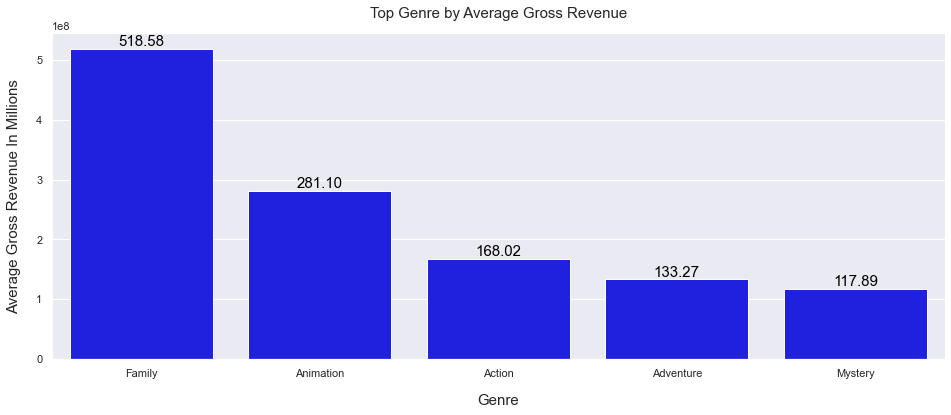

In [32]:
# plot barchart 
barplot=sns.barplot(x=top_genre_revenue.index, y=top_genre_revenue['Gross'], color='blue')

# Adding annotations
for index, value in enumerate(top_genre_revenue['Gross']):
    barplot.text(index, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=15, color='black')

# Adding labels and title
plt.xlabel('Genre', size=15, labelpad=15)
plt.ylabel('Average Gross Revenue In Millions', size=15, labelpad=15)
plt.title('Top Genre by Average Gross Revenue', fontsize=15, pad=15);


Family movies are the best bet for financial success which generated over 500 million on average, followed by Animation, Action, Adventure and Mystery genre 

### 3. MOST PRODUCED GENRE 

In [33]:
genre_counts = df['Genre'].value_counts()
genre_counts

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: Genre, dtype: int64

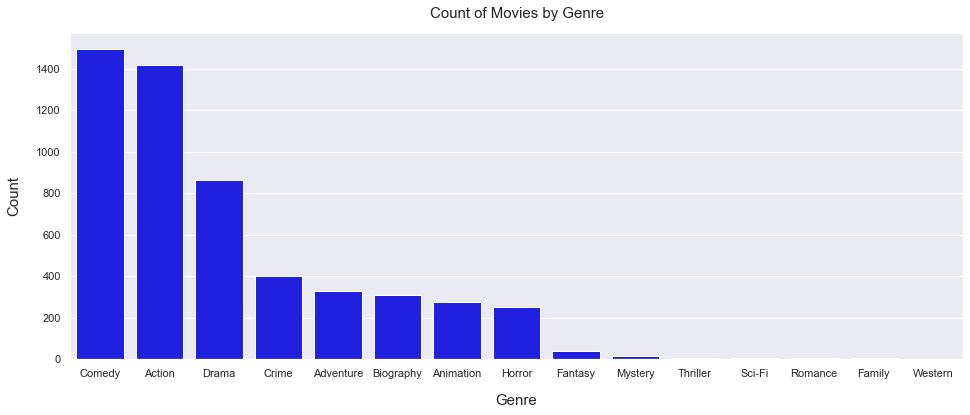

In [34]:
sns.countplot(x=df['Genre'], order=df['Genre'].value_counts().index, color='blue')

# Adding labels and title
plt.xlabel('Genre', size=15, labelpad=15)
plt.ylabel('Count', size=15, labelpad=15)
plt.title('Count of Movies by Genre', fontsize=15, pad=15)
plt.show()


### 4. COUNTRY THAT PRODUCED THE MOST MOVIE 

In [35]:
x=df.Country.value_counts().head(6)
x

United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Australia           42
Name: Country, dtype: int64

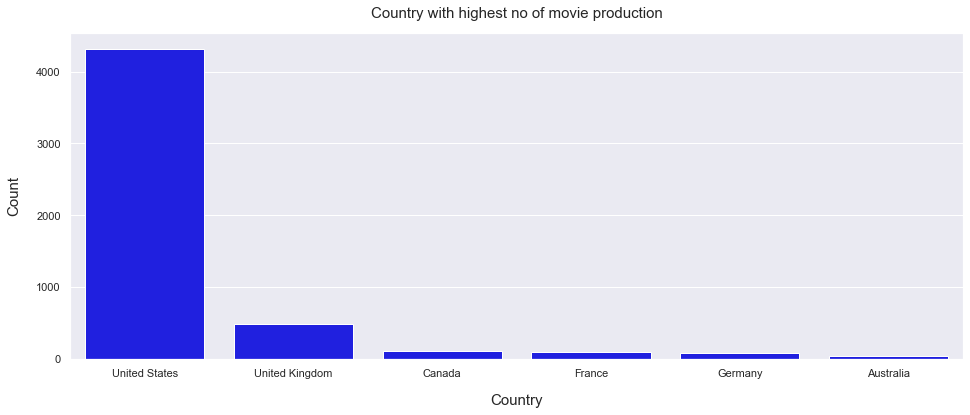

In [36]:
#plot chart
countplot=sns.countplot(x=df['Country'], order=df['Country'].value_counts().head(6).index, color='blue')

# Adding labels and title
plt.xlabel('Country', size=15, labelpad=15)
plt.ylabel('Count', size=15, labelpad=15)
plt.title('Country with highest no of movie production', fontsize=15, pad=15);

The united states is the centre of movie production, having produced over 4000 movies about 50% of total movies produced over the years

### 5. TRENDS IN MOVIE PRODUCTION

In [37]:
movie_counts_per_year = df['Year'].value_counts().sort_index()
movie_counts_per_year

1980     40
1981     63
1982     71
1983     83
1984     88
1985     95
1986     99
1987    104
1988    130
1989    115
1990    111
1991    113
1992    131
1993    140
1994    128
1995    138
1996    144
1997    149
1998    148
1999    162
2000    162
2001    164
2002    173
2003    159
2004    158
2005    170
2006    163
2007    157
2008    171
2009    171
2010    164
2011    160
2012    162
2013    161
2014    163
2015    156
2016    158
2017    133
2018    143
2019    113
2020      8
Name: Year, dtype: int64

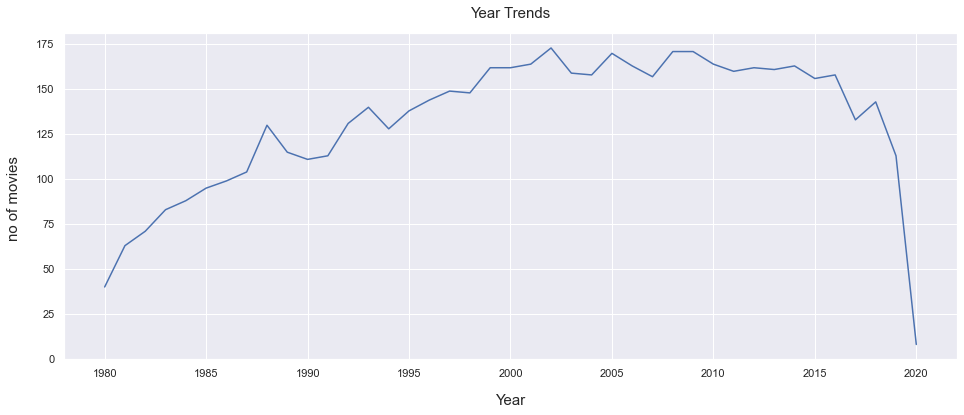

In [38]:
# plot lineplot
sns.lineplot(x=movie_counts_per_year.index, y=movie_counts_per_year.values)

# Adding labels and title
plt.xlabel('Year', size=15, labelpad=15)
plt.ylabel('no of movies ', size=15, labelpad=15)
plt.title('Year Trends', fontsize=15, pad=15);

plt.show()

### 6. BUDGET DISTRIBUTION OF MOVIES

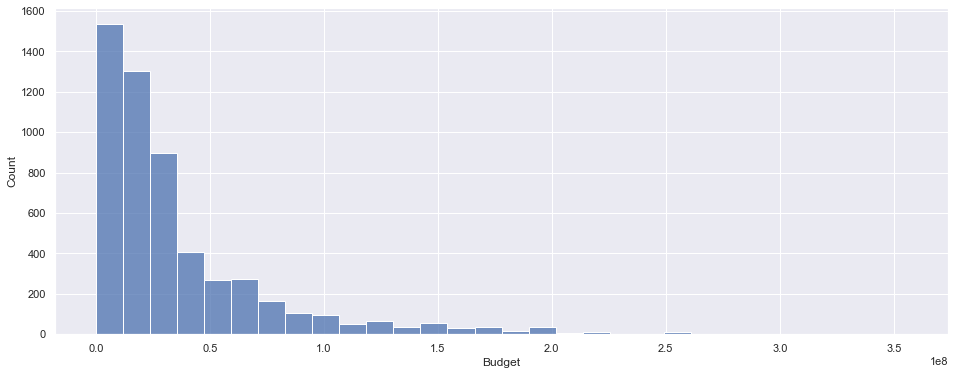

In [39]:
# plot histogram
sns.histplot(data=df, x='Budget', bins=30)
plt.show()

This shows that most of the movies had a budget less than 50 million 

### 7. CORRELATION ANALYSIS 

Here I will check the correlation between numeric datatypes

In [40]:
corr=df.corr()
corr

,Year,Score,Votes,Budget,Gross,Runtime
Year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
Score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
Votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
Budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
Gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
Runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


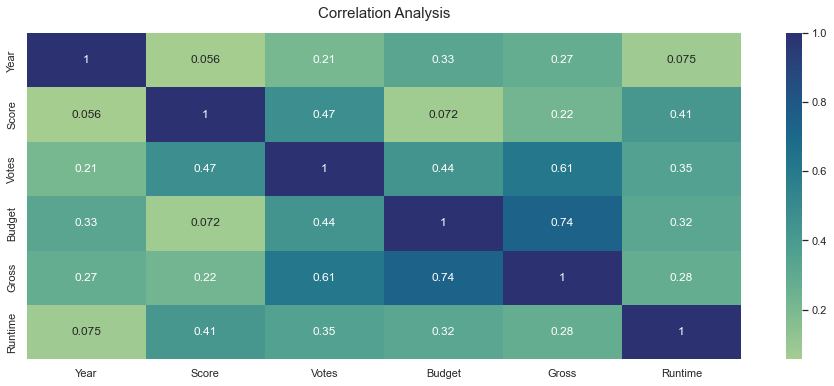

In [41]:
sns.heatmap(corr,cmap='crest',annot=True)

plt.title('Correlation Analysis', fontsize=15, pad=15)
plt.show()

Budget and gross , Gross and votes are highly correlated while Budget and votes are correlated a little, The remaining variables have really low correlation

### 8. BUDGET AND GROSS RELATIONSHIP 

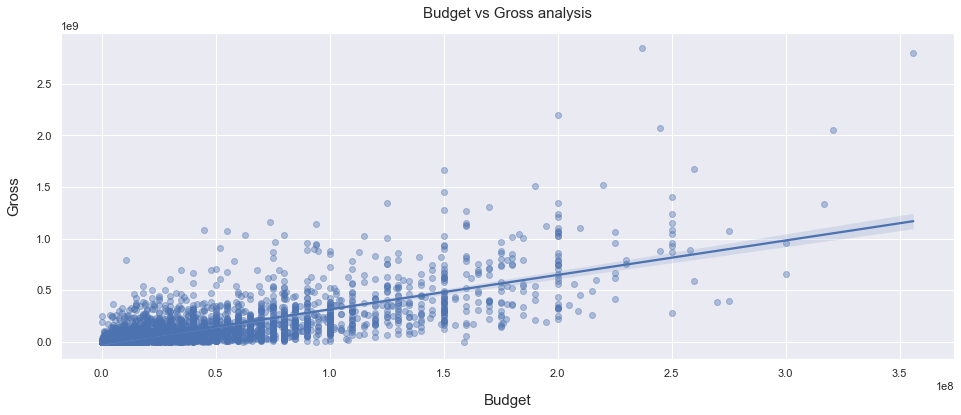

In [42]:
# plot correlation graph between Budget and Revenue 
sns.regplot(data =df, x='Budget', y='Gross', scatter_kws={'alpha':0.4})

# Adding labels and title
plt.xlabel('Budget', size=15, labelpad=15)
plt.ylabel('Gross', size=15, labelpad=15)
plt.title('Budget vs Gross analysis', fontsize=15, pad=15)
plt.show()

This shows that the higher the movie budget the higher the revenue generated 

### 9. COMPANY PERFORMANCE

In [43]:
company_average_revenue=df[['Company', 'Gross']].groupby('Company').mean()
sorted_company_average_revenue=company_average_revenue.sort_values('Gross', ascending=False)
top_company_average_revenue =sorted_company_average_revenue.head(25)
top_company_average_revenue

,Gross
Company,
Marvel Studios,1.255466e+09
Illumination Entertainment,1.097122e+09
Fairview Entertainment,9.665549e+08
B24,8.806815e+08
Avi Arad Productions,8.560852e+08
Chris Morgan Productions,7.590569e+08
Jolie Pas,7.584118e+08
Lucasfilm,7.185352e+08
Marvel Entertainment,7.144215e+08


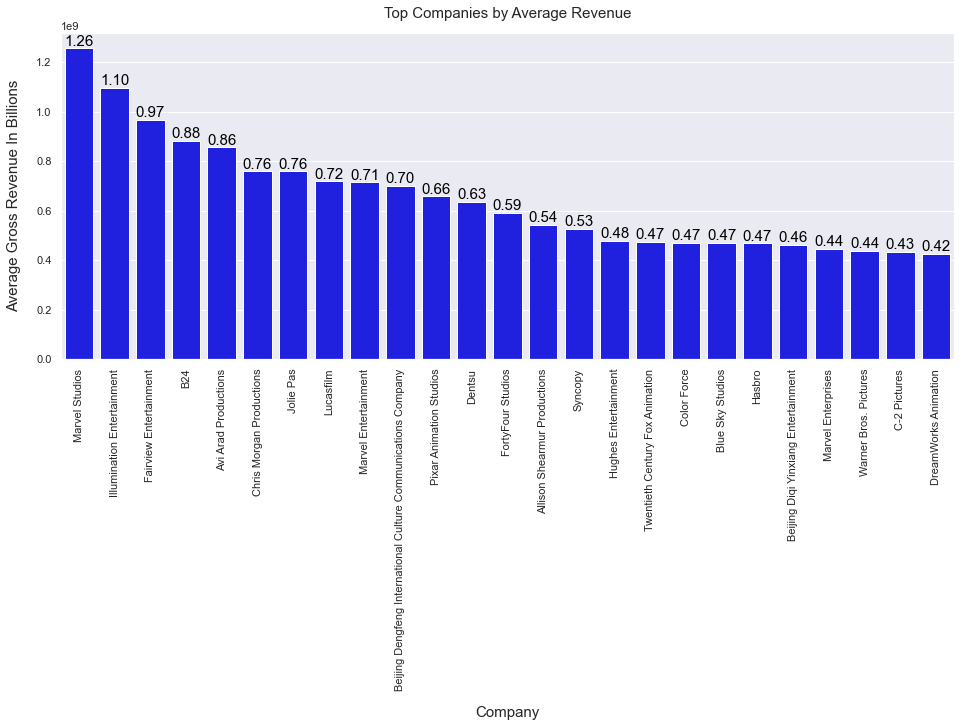

In [44]:
# plot the barplot
barplot=sns.barplot(x=top_company_average_revenue.index, y=top_company_average_revenue['Gross'], color='blue')

# Adding annotations
for index, value in enumerate(top_company_average_revenue['Gross']):
    barplot.text(index, value, f'{value/1e9:.2f}', ha='center', va='bottom', fontsize=15, color='black')

# Adding labels and title
plt.xlabel('Company', size=15, labelpad=15)
plt.ylabel('Average Gross Revenue In Billions', size=15, labelpad=15)
plt.title('Top Companies by Average Revenue', fontsize=15, pad=15)
plt.xticks(rotation=90)
# Display the plot
plt.show()

# INSIGHTS 

1. The industry seem to be studded with brilliant directors, the top director Robert Benigni has an average rating of 8.6, other directors are also on the edge with their very close average movie rating.
2. Movies with family genre might have won people's heart generating over 500 million despite only 4 movies being produced 
3. Comedy movies are the most produced movies over the years
4. United state produced the most movies, over 4000 movies have been produced over the years 
5. There was a huge decline in movie production in year 2020, this would be because of Covid
6. Most of the produced movies had budget less than 50 million 
7. The higher the budget on a movie, the higher the revenue generated 
8. Marvel Studios is the top performing company having generated over 1 billion